# Deliverable 1: M/C Rate EDA

In [3]:
# Import library and Read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

p_a = pd.read_csv("Appointment List.csv", 
                           names=['Office Id', 'Appointment Id', 'Patient Id', 'Provider Short Id',
                                  'Appointment Date', 'Appointment Length', 'Appointment Status',
                                  'New Patient','Missed Appointment', 'DateTime Marked As Missed',
                                  'Marked As Missed By', 'Cancelled Appointment', 'DateTime Marked As Cancelled',
                                  'Marked As Cancelled By', 'Appointment Posted'],
                           parse_dates=['Appointment Date','DateTime Marked As Missed', 'DateTime Marked As Cancelled'])

df_p = pd.read_excel('Patient List.xlsx')

df_provider = pd.read_excel('Provider List.xlsx')


In [4]:
p_a.head()

,Office Id,Appointment Id,Patient Id,Provider Short Id,Appointment Date,Appointment Length,Appointment Status,New Patient,Missed Appointment,DateTime Marked As Missed,Marked As Missed By,Cancelled Appointment,DateTime Marked As Cancelled,Marked As Cancelled By,Appointment Posted
0,101,90559181,90036617,4072,2019-03-20 08:00:00,50,15,N,N,NaT,NaN,N,NaT,NaN,Y
1,101,90688047,90044824,1109,2019-08-19 13:00:00,60,3,N,N,NaT,NaN,Y,2019-08-17 08:04:00,SKATADZICGD,N
2,101,90710011,1028224,4072,2019-04-18 13:00:00,50,15,N,N,NaT,NaN,N,NaT,NaN,Y
3,101,90824886,90036766,4214,2019-01-18 13:00:00,60,15,N,N,NaT,NaN,N,NaT,NaN,Y
4,101,90824894,90036766,1203,2019-01-18 14:00:00,30,15,N,N,NaT,NaN,N,NaT,NaN,Y


### M/C Ratio

In [5]:
# define function to plot the M/C Ratio
def mc_plt(df):   
    missed_and_cancelled_appointments = df[(df['Cancelled Appointment'] == 'Y') & (df['Missed Appointment'] == 'Y')]
    cancelled_only_appointments = df[(df['Cancelled Appointment'] == 'Y') & (df['Missed Appointment'] == 'N')]
    missed_only_appointments = df[(df['Cancelled Appointment'] == 'N') & (df['Missed Appointment'] == 'Y')]
    normal_appointments = df[(df['Cancelled Appointment'] == 'N') & (df['Missed Appointment'] == 'N')]
    appointment_numbers = [len(normal_appointments), len(missed_only_appointments), len(cancelled_only_appointments), len(missed_and_cancelled_appointments)]
    appointment_ratios = [len(normal_appointments)/len(df)*100, len(missed_only_appointments)/len(df)*100, len(cancelled_only_appointments)/len(df)*100, len(missed_and_cancelled_appointments)/len(df)*100]

    plt.pie(appointment_ratios, labels=[
        'Normal Appointments {0:.2f}%'.format(appointment_ratios[0]),
        'Only Marked as Missed {0:.2f}%'.format(appointment_ratios[1]),
        'Only Marked as Cancelled {0:.2f}%'.format(appointment_ratios[2]),
        'Marked as both Missed and Cancelled {0:.2f}%'.format(appointment_ratios[3])])
    plt.title('Appointment M/C Ratio')
    plt.show()
    

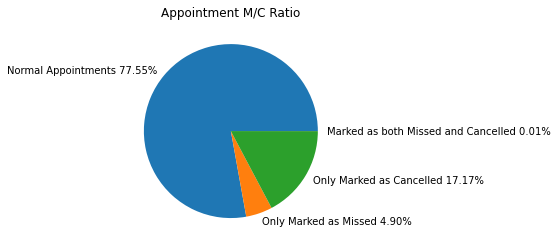

In [6]:
mc_plt(p_a)

Overall, the canceltion and missing rate is 17.17% and 4.9% respectively

### M/C Ratio based on new patient or not

In [7]:
# group by new patient
newpatient_count = p_a.groupby(['New Patient']).size().to_frame('size').reset_index()
newpatient_count

,New Patient,size
0,N,2795163
1,Y,67155


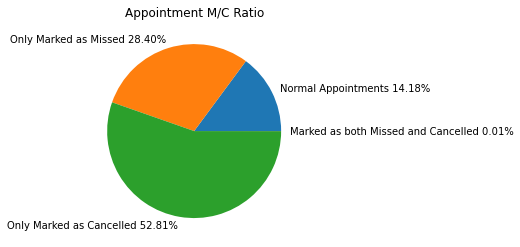

In [8]:
df_new = p_a[p_a['New Patient'] == 'Y']
mc_plt(df_new)

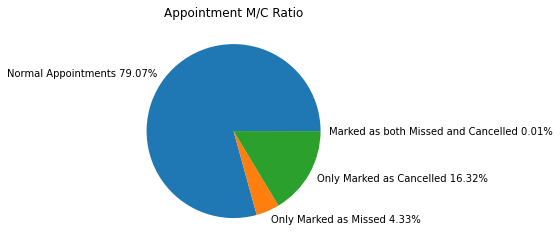

In [9]:
df_regular = p_a[p_a['New Patient'] == 'N']
mc_plt(df_regular)

Comparing these two plots, we found that the cancellation rate of new patients was 52.81% and the missing rate was 28.4%, while the cancellation and missing rates of old patients were only 16.32% and 4.33%. As a result, new patients have a higher probability of cancelling or missing appointments.

### M/C Ratio based on Provider Specialty

In [10]:
df_provider.head()

,Provider Short ID,Provider First Name,Provider Last Name,Provider Specialty
0,4487,Eddy,Pierribia,Hygienist
1,4488,Casandra,Hardy,Hygienist
2,4489,Francine,Pierre,Hygienist
3,1508,Niusha,Nikkholgh,Endodontist
4,4490,Marjorie,Madera,Hygienist


In [11]:
# merge provider table and appointment table
df_provider = df_provider.rename(columns={'Provider Short ID': 'Provider Short Id'})
patientprovider = pd.merge(p_a,df_provider,on='Provider Short Id',how = 'left')

In [12]:
patientprovider.head()

,Office Id,Appointment Id,Patient Id,Provider Short Id,Appointment Date,Appointment Length,Appointment Status,New Patient,Missed Appointment,DateTime Marked As Missed,Marked As Missed By,Cancelled Appointment,DateTime Marked As Cancelled,Marked As Cancelled By,Appointment Posted,Provider First Name,Provider Last Name,Provider Specialty
0,101,90559181,90036617,4072,2019-03-20 08:00:00,50,15,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN
1,101,90688047,90044824,1109,2019-08-19 13:00:00,60,3,N,N,NaT,NaN,Y,2019-08-17 08:04:00,SKATADZICGD,N,NaN,NaN,NaN
2,101,90710011,1028224,4072,2019-04-18 13:00:00,50,15,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN
3,101,90824886,90036766,4214,2019-01-18 13:00:00,60,15,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN
4,101,90824894,90036766,1203,2019-01-18 14:00:00,30,15,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN


In [13]:
# group by new Provider Specialty
Specialty_count = patientprovider.groupby(['Provider Specialty']).size().to_frame('size').reset_index()
Specialty_count

,Provider Specialty,size
0,Conversion Doctor,973
1,Director,57866
2,Endodontist,3690
3,General Dentist,44313
4,Hygienist,140344
5,Oral Surgeon,9190
6,Orthodontist,44374
7,Pedodontist,4737
8,Periodontist,15665
9,Practice,461


In [14]:
# divide data into different groups based on Provider Specialty
Conversion_Doctor = patientprovider[patientprovider['Provider Specialty'] == 'Conversion Doctor']
Director = patientprovider[patientprovider['Provider Specialty'] == 'Director']
Endodontist = patientprovider[patientprovider['Provider Specialty'] == 'Endodontist']
General_Dentist = patientprovider[patientprovider['Provider Specialty'] == 'General Dentist']
Hygienist = patientprovider[patientprovider['Provider Specialty'] == 'Hygienist']
Oral_Surgeon = patientprovider[patientprovider['Provider Specialty'] == 'Oral Surgeon']
Orthodontist = patientprovider[patientprovider['Provider Specialty'] == 'Orthodontist']
Pedodontist = patientprovider[patientprovider['Provider Specialty'] == 'Pedodontist']
Periodontist = patientprovider[patientprovider['Provider Specialty'] == 'Periodontist']
Practice = patientprovider[patientprovider['Provider Specialty'] == 'Practice']
Transaction_Doctor = patientprovider[patientprovider['Provider Specialty'] == 'Transaction Doctor']

In [15]:
# define function to calculate M/C ratio
def mc_ratio (dataframe):
    missed_and_cancelled_appointments = dataframe[(dataframe['Cancelled Appointment'] == 'Y') & (dataframe['Missed Appointment'] == 'Y')]
    cancelled_only_appointments = dataframe[(dataframe['Cancelled Appointment'] == 'Y') & (dataframe['Missed Appointment'] == 'N')]
    missed_only_appointments = dataframe[(dataframe['Cancelled Appointment'] == 'N') & (dataframe['Missed Appointment'] == 'Y')]
    normal_appointments = dataframe[(dataframe['Cancelled Appointment'] == 'N') & (dataframe['Missed Appointment'] == 'N')]
    
    appointment_ratios = [len(normal_appointments)/len(dataframe)*100, 
                          len(missed_only_appointments)/len(dataframe)*100, 
                          len(cancelled_only_appointments)/len(dataframe)*100, 
                          len(missed_and_cancelled_appointments)/len(dataframe)*100]
    dic = {'name': ['normal_appointments','missed_only_appointments','cancelled_only_appointments','missed_and_cancelled_appointments'], 'value' : appointment_ratios}
    df_provider_ratio = pd.DataFrame(dic).transpose()
    df_provider_ratio = df_provider_ratio.rename(columns=df_provider_ratio.iloc[0]).drop(df_provider_ratio.index[0])
    return df_provider_ratio


In [16]:
Conversion_Doctor = mc_ratio (Conversion_Doctor)
Director_ratio = mc_ratio (Director)
Endodontist_ratio = mc_ratio (Endodontist)
General_Dentist_ratio = mc_ratio (General_Dentist)
Hygienist_ratio = mc_ratio (Hygienist)
Oral_Surgeon_ratio = mc_ratio (Oral_Surgeon)
Orthodontist_ratio = mc_ratio (Orthodontist)
Pedodontist_ratio = mc_ratio (Pedodontist)
Periodontist_ratio = mc_ratio (Periodontist)
Practice_ratio = mc_ratio (Practice)
Transaction_Doctor_ratio = mc_ratio (Transaction_Doctor)

In [17]:
df_provider_ratio = pd.concat([Conversion_Doctor, Director_ratio, Endodontist_ratio, General_Dentist_ratio, 
           Hygienist_ratio, Oral_Surgeon_ratio, Orthodontist_ratio, Pedodontist_ratio, Periodontist_ratio,
           Practice_ratio, Transaction_Doctor_ratio])

df_provider_ratio.index = ['Conversion_Doctor', 'Director_ratio', 'Endodontist_ratio', 'General_Dentist_ratio',
                           'Hygienist_ratio','Oral_Surgeon_ratio','Orthodontist_ratio','Pedodontist_ratio',
                           'Periodontist_ratio','Practice_ratio','Transaction_Doctor_ratio']
df_provider_ratio

,normal_appointments,missed_only_appointments,cancelled_only_appointments,missed_and_cancelled_appointments
Conversion_Doctor,47.3792,0.924974,15.9301,0
Director_ratio,81.0165,3.64981,15.3112,0
Endodontist_ratio,71.7073,7.15447,21.1111,0
General_Dentist_ratio,81.2673,5.07526,13.355,0.00225667
Hygienist_ratio,77.9314,4.95354,17.0039,0
Oral_Surgeon_ratio,72.8183,5.72361,21.4581,0
Orthodontist_ratio,77.9984,5.30491,16.6945,0
Pedodontist_ratio,80.5151,8.00084,11.4418,0
Periodontist_ratio,77.6061,4.66007,17.7274,0
Practice_ratio,22.3427,5.63991,69.8482,0


Based on this table, the cancellation and missing rate for patients to visit Director, General Dentist, and Pedodontist was relatively low. The cancellation and missing rate for not first-time patient to visit Conversion Doctor and Practice was relatively high. The cancellation and missing rate for Transaction Doctor was 0 because there was only one patient came to visit Transaction Doctor.

### M/C Ratio based on appointment status

In [21]:
appointmenttype = [1,2,3,4,5,12,13,14,15]
typeapp = ['scheduled','comfirmed','left message','in operatory','in reception','missed','uncomfirmed','cancelled','checked out']
dfnew = pd.DataFrame({'Appointment Status':appointmenttype,'typeapp':typeapp})
dfnew = pd.merge(dfnew,patientprovider,on='Appointment Status',how = 'inner')
dfnew

,Appointment Status,typeapp,Office Id,Appointment Id,Patient Id,Provider Short Id,Appointment Date,Appointment Length,New Patient,Missed Appointment,DateTime Marked As Missed,Marked As Missed By,Cancelled Appointment,DateTime Marked As Cancelled,Marked As Cancelled By,Appointment Posted,Provider First Name,Provider Last Name,Provider Specialty
0,1,scheduled,101,90870613,1028395,4072,2019-06-04 16:50:00,50,N,N,NaT,NaN,Y,2018-06-18 07:48:00,JCUADRADOGD,N,NaN,NaN,NaN
1,1,scheduled,101,90870617,1028395,1144,2019-06-04 17:30:00,60,N,N,NaT,NaN,Y,2018-06-18 07:48:00,JCUADRADOGD,N,NaN,NaN,NaN
2,1,scheduled,101,90905666,1028307,4060,2019-04-20 15:10:00,50,N,N,NaT,NaN,Y,2019-04-12 05:59:00,SKATADZICGD,N,NaN,NaN,NaN
3,1,scheduled,101,90905668,1028307,1144,2019-04-20 14:00:00,60,N,N,NaT,NaN,Y,2019-04-12 05:59:00,SKATADZICGD,N,NaN,NaN,NaN
4,1,scheduled,101,90957326,1027190,4214,2019-01-26 11:30:00,40,N,N,NaT,NaN,Y,2019-01-21 12:02:00,SKATADZICGD,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862313,15,checked out,199,105004333,99040959,1690,2022-06-02 16:40:00,20,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN
2862314,15,checked out,199,105004334,99044820,1690,2022-06-02 15:00:00,20,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN
2862315,15,checked out,199,105004335,99044821,1690,2022-06-02 15:00:00,30,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN
2862316,15,checked out,199,105004336,99044686,1690,2022-06-02 15:50:00,30,N,N,NaT,NaN,N,NaT,NaN,Y,NaN,NaN,NaN


In [28]:
patienttypes = pd.read_excel('Patient Types.xlsx')
patientandtypes = pd.merge(df_p,patienttypes,left_on = 'Patient Type',right_on = 'Patient Type Code',how = 'inner')
patientandtypes

,Patient ID,Responsible Party ID,Patient Zip,Active/Inactive,Birth Year,Patient Gender,Patient Home Office ID,Patient Home Office Name,Patient First Visit Date,Patient Last Visit Date,Patient Type,Responsible Party Type,Patient Type Code,Patient Type Description
0,1000774,1000652,02465,Active,1923,F,101,Brookline,1994-01-21,2020-10-12,UP,NU,UP,Update Needed
1,1001857,1001604,02124,Active,1952,F,101,Brookline,1994-06-14,2020-01-24,UP,IN,UP,Update Needed
2,1002454,1002123,02446,Active,1963,M,101,Brookline,2018-07-23,2019-09-17,UP,IN,UP,Update Needed
3,1002568,1002213,02445,Active,1976,F,101,Brookline,1996-08-22,2022-01-20,UP,IN,UP,Update Needed
4,1002634,1002271,02155,Active,1960,F,175,Medford,1993-05-12,2020-12-09,UP,CA,UP,Update Needed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192902,90191016,90174957,14221,Active,1992,M,102,Newbury,2021-06-01,2021-06-01,CS,IN,CS,Creole Speaking
192903,90209504,90192354,02301,Active,1962,M,129,Brockton,2021-09-28,2021-09-28,CS,IN,CS,Creole Speaking
192904,90209524,90192375,02302,Active,1979,M,129,Brockton,2021-09-28,2021-10-01,CS,UA,CS,Creole Speaking
192905,90216495,90198931,02301,Active,1970,F,129,Brockton,2021-11-11,2022-06-09,CS,CA,CS,Creole Speaking


In [30]:
p_p_type = pd.merge(dfnew,patientandtypes,left_on = 'Patient Id',right_on = 'Patient ID',how = 'left')
p_p_type

,Appointment Status,typeapp,Office Id,Appointment Id,Patient Id,Provider Short Id,Appointment Date,Appointment Length,New Patient,Missed Appointment,...,Birth Year,Patient Gender,Patient Home Office ID,Patient Home Office Name,Patient First Visit Date,Patient Last Visit Date,Patient Type,Responsible Party Type,Patient Type Code,Patient Type Description
0,1,scheduled,101,90870613,1028395,4072,2019-06-04 16:50:00,50,N,N,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,1,scheduled,101,90870617,1028395,1144,2019-06-04 17:30:00,60,N,N,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,1,scheduled,101,90905666,1028307,4060,2019-04-20 15:10:00,50,N,N,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,1,scheduled,101,90905668,1028307,1144,2019-04-20 14:00:00,60,N,N,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,1,scheduled,101,90957326,1027190,4214,2019-01-26 11:30:00,40,N,N,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862313,15,checked out,199,105004333,99040959,1690,2022-06-02 16:40:00,20,N,N,...,2010.0,M,199.0,DCA - Selinsgrove,2019-04-11,2022-06-02,UP,NU,UP,Update Needed
2862314,15,checked out,199,105004334,99044820,1690,2022-06-02 15:00:00,20,N,N,...,2005.0,F,199.0,DCA - Selinsgrove,2021-04-29,2022-06-02,UP,NU,UP,Update Needed
2862315,15,checked out,199,105004335,99044821,1690,2022-06-02 15:00:00,30,N,N,...,2007.0,F,199.0,DCA - Selinsgrove,2021-04-29,2022-06-02,UP,NU,UP,Update Needed
2862316,15,checked out,199,105004336,99044686,1690,2022-06-02 15:50:00,30,N,N,...,2011.0,F,199.0,DCA - Selinsgrove,2021-02-25,2022-06-02,UP,NU,UP,Update Needed


In [35]:
p_a['Appointment Status'].value_counts()

15    1870522
1      598032
2      157858
3      131820
4       55542
5       32107
13      16437
Name: Appointment Status, dtype: int64

<AxesSubplot:>

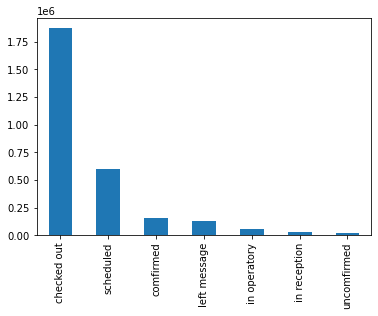

In [36]:
x =  p_p_type['typeapp'].value_counts()
x.plot(kind='bar')

In [49]:
# divide data into different groups based on appointment status
checkedout = p_p_type[p_p_type['typeapp'] == 'checked out']
scheduled = p_p_type[p_p_type['typeapp'] == 'scheduled']
comfirmed = p_p_type[p_p_type['typeapp'] == 'comfirmed']
leftmessage =  p_p_type[p_p_type['typeapp'] == 'left message']
inoperatory =  p_p_type[p_p_type['typeapp'] == 'in operatory']
inreception =  p_p_type[p_p_type['typeapp'] == 'in reception']
missed = p_p_type[p_p_type['typeapp'] == 'missed']
cancelled = p_p_type[p_p_type['typeapp'] == 'cancelled']
uncomfirmed = p_p_type[p_p_type['typeapp'] == 'uncomfirmed']

In [50]:
checkedout_ratio = mc_ratio (checkedout)
scheduled_ratio = mc_ratio (scheduled)
comfirmed_ratio = mc_ratio (comfirmed)
leftmessage_ratio = mc_ratio (leftmessage)
inoperatory_ratio = mc_ratio (inoperatory)
inreception_ratio = mc_ratio (inreception)
#missed_ratio = mc_ratio (missed)
#cancelled_ratio = mc_ratio (cancelled)
uncomfirmed_ratio = mc_ratio (uncomfirmed)

In [51]:
df_status_ratio = pd.concat([checkedout_ratio, scheduled_ratio, comfirmed_ratio, leftmessage_ratio, 
           inoperatory_ratio, inreception_ratio, uncomfirmed_ratio])

df_status_ratio.index = ['checkedout_ratio', 'scheduled_ratio', 'comfirmed_ratio', 'leftmessage_ratio',
                           'inoperatory_ratio','inreception_ratio','uncomfirmed_ratio']
df_status_ratio

,normal_appointments,missed_only_appointments,cancelled_only_appointments,missed_and_cancelled_appointments
checkedout_ratio,99.9196,0.019941,0.0604109,0
scheduled_ratio,40.812,5.00575,52.3835,0.0324397
comfirmed_ratio,9.96529,33.1893,56.7808,0.0228053
leftmessage_ratio,9.93248,37.4852,52.5596,0.0121378
inoperatory_ratio,92.665,0.538331,6.77685,0.0090022
inreception_ratio,74.4884,2.87476,22.6119,0.0218021
uncomfirmed_ratio,14.516,41.7716,43.7063,0.00608384


<AxesSubplot:>

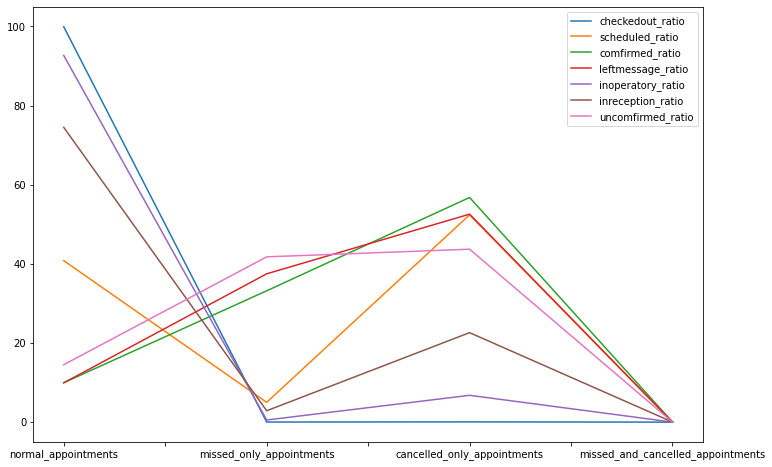

In [61]:
#plot
df_status_ratio.transpose().plot(figsize = (12,8))

<AxesSubplot:>

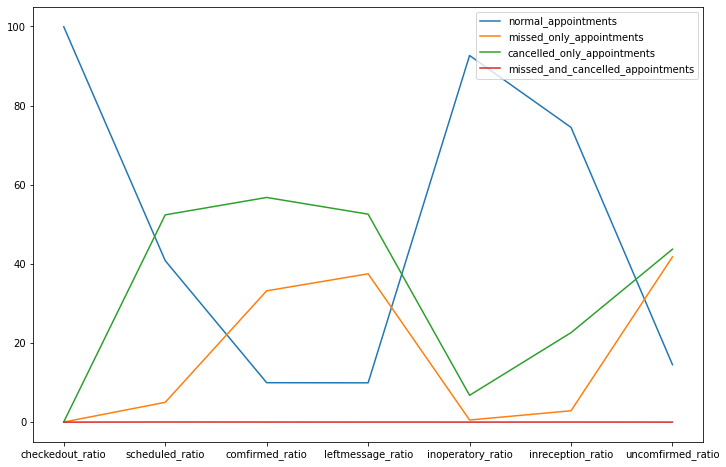

In [64]:
df_status_ratio.plot(figsize = (12,8))

### M/C Ratio based on comfirmation type

In [57]:
comviaphone = p_p_type[p_p_type['Patient Type'] == 'CP']
comviatext = p_p_type[p_p_type['Patient Type'] == 'CT']
comviaemail = p_p_type[p_p_type['Patient Type'] == 'CE']

In [58]:
comviaphone_ratio = mc_ratio (comviaphone)
comviatext_ratio = mc_ratio (comviatext)
comviaemail_ratio = mc_ratio (comviaemail)

In [59]:
df_comtype_ratio = pd.concat([comviaphone_ratio, comviatext_ratio, comviaemail_ratio])

df_comtype_ratio.index = ['comviaphone_ratio', 'comviatext_ratio', 'comviaemail_ratio']
df_comtype_ratio

,normal_appointments,missed_only_appointments,cancelled_only_appointments,missed_and_cancelled_appointments
comviaphone_ratio,80.2949,4.25013,15.096,0.043844
comviatext_ratio,79.0735,4.22507,15.6179,0.0497067
comviaemail_ratio,80.1525,3.85063,15.9064,0.0258431


<AxesSubplot:>

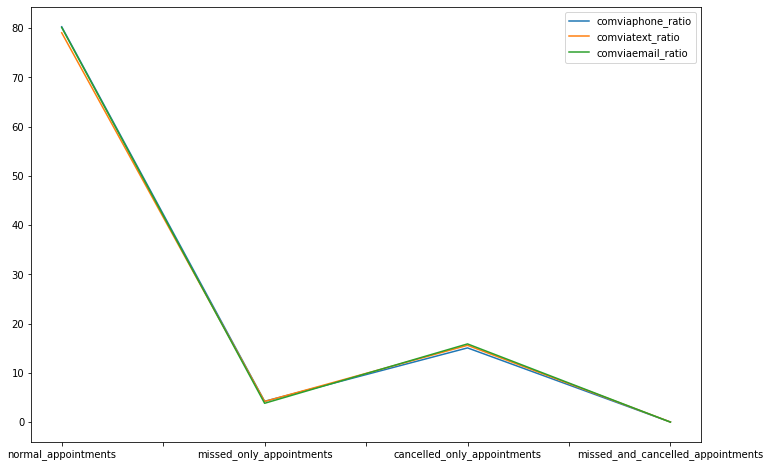

In [62]:
#plot
df_comtype_ratio.transpose().plot(figsize = (12,8))

<AxesSubplot:>

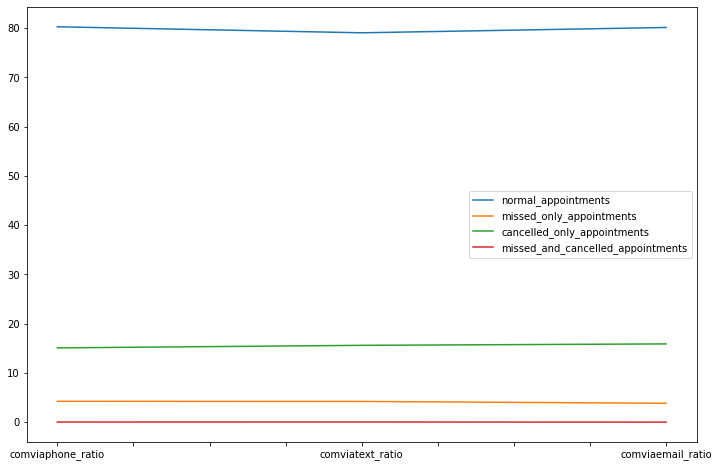

In [65]:
#plot
df_comtype_ratio.plot(figsize = (12,8))